In [56]:
from __future__ import print_function
from __future__ import division
from __future__ import unicode_literals

import numpy as np
import deepchem as dc
from deepchem.molnet import load_delaney
from deepchem.models import GraphConvModel
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


#Setting up model

In [103]:
##input malaria file
# delaney_tasks = ['Desired_property']
delaney_tasks = ['clearance']

featurizer = dc.feat.ConvMolFeaturizer()
# featurizer = dc.feat.RDKitDescriptors()

input_dataset = '../../../project1_data/Series4_full_clearanceOnly.csv'

loader = dc.data.CSVLoader(tasks=delaney_tasks, smiles_field="SMILES", featurizer=featurizer)
dataset = loader.featurize(input_dataset, shard_size=8192)

# Options of transformers
# dc.trans.LogTransformer
# dc.trans.ClippingTransformer
# dc.trans.NormalizationTransformer
# dc.trans.AtomicNormalizationTransformer
# dc.trans.BalancingTransformer
# dc.trans.CDFTransformer
# dc.trans.PowerTransformer
# dc.trans.CoulombRandomizationTransformer
# dc.trans.CoulombBinarizationTransformer


# Initialize transformers
transformers = [
  dc.trans.NormalizationTransformer(
      transform_y=True, dataset=dataset)
]

# transformers = [
#   dc.trans.BalancingTransformer(dataset=dataset)
# ]

print("About to transform data")
for transformer in transformers:
    dataset = transformer.transform(dataset)

# splitters = {
#   'index': dc.splits.IndexSplitter(),
#   'random': dc.splits.RandomSplitter(),
#   'scaffold': dc.splits.ScaffoldSplitter()
# }
splitter = dc.splits.IndexSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(dataset, 
                                                                            frac_train = 0.8, 
                                                                             frac_valid  = 0.1, 
                                                                             frac_test  = 0.1
                                                                            )
type(train_dataset)

Loading raw samples now.
shard_size: 8192
About to start loading CSV from ../../../project1_data/Series4_full_clearanceOnly.csv
Loading shard 1 of size 8192.
Featurizing sample 0
TIMING: featurizing shard 0 took 0.415 s
TIMING: dataset construction took 0.525 s
Loading dataset from disk.
About to transform data
TIMING: dataset construction took 0.086 s
Loading dataset from disk.
TIMING: dataset construction took 0.071 s
Loading dataset from disk.
TIMING: dataset construction took 0.047 s
Loading dataset from disk.
TIMING: dataset construction took 0.037 s
Loading dataset from disk.


deepchem.data.datasets.DiskDataset

In [104]:
# Load Delaney dataset
# delaney_tasks, delaney_datasets, transformers = load_delaney(
#     featurizer='GraphConv', split='index')
# train_dataset, valid_dataset, test_dataset = dataset

# Fit models
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score, np.mean)

# Do setup required for tf/keras models
# Number of features on conv-mols
n_feat = 100
# Batch size of models
batch_size = 70
model = GraphConvModel(
    len(delaney_tasks), 
#     graph_conv_layers=[128,128],
#     dense_layer_size=256,
    batch_size=batch_size, mode='regression')


In [105]:
print("training data length", len(train_dataset))
print("validation data length", len(test_dataset))
print("test data length", len(test_dataset))

training data length 204
validation data length 26
test data length 26


##Train model

0
computed_metrics: [0.010628794891059383]
computed_metrics: [0.00022408204310627152]
computed_metrics: [0.00010532834327145528]
5


/Users/KHatti001/opt/anaconda3/envs/chem_ml/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/KHatti001/opt/anaconda3/envs/chem_ml/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/KHatti001/opt/anaconda3/envs/chem_ml/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.2187743227678761]
computed_metrics: [0.4458476904936493]
computed_metrics: [0.008263745722682679]
10
computed_metrics: [0.34886280962129296]
computed_metrics: [0.254349707003147]
computed_metrics: [0.0032669166267172973]
15
computed_metrics: [0.5978740627079512]
computed_metrics: [0.2139369128788254]
computed_metrics: [0.030987378976594326]
20
computed_metrics: [0.7805261887902167]
computed_metrics: [0.33272140607353523]
computed_metrics: [0.06305928848995518]
25
computed_metrics: [0.8843484533499691]
computed_metrics: [0.4446037255528329]
computed_metrics: [0.02850494952678298]
30
computed_metrics: [0.9352892784561372]
computed_metrics: [0.5202236565218409]
computed_metrics: [0.022281485508488613]
35
computed_metrics: [0.9664418461924444]
computed_metrics: [0.6956560282235185]
computed_metrics: [0.021097872181791318]
40
computed_metrics: [0.9771005885990764]
computed_metrics: [0.7239253831149026]
computed_metrics: [0.021551815186007076]
45
computed_metrics: [0.983

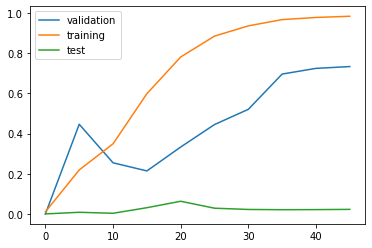

In [106]:
# Fit trained model
def run_and_store_results(nb_epoch_value):
    scoring_function_used = "mean-pearson_r2_score"
#     scoring_function_used = "r2_score"
    model.fit(train_dataset, nb_epoch=nb_epoch_value)

#     print("Evaluating model")
    train_scores =  model.evaluate(train_dataset, [metric], transformers)
    valid_scores = model.evaluate(valid_dataset, [metric], transformers)
    test_scores = model.evaluate(test_dataset, [metric], transformers)
#     print("printing some value", train_scores[scoring_function_used])
    return train_scores[scoring_function_used],valid_scores[scoring_function_used], test_scores[scoring_function_used]

#     print("Train scores")
#     print(train_scores)

#     print("Validation scores")
#     print(valid_scores)

# model.restore()

valid_scores_list=[]
train_scores_list=[]
test_scores_list=[]
epoch_inputs_list=[]

for nb_epoch_value in range(0,50,5):
# for nb_epoch_value in [5,20]:
    print (nb_epoch_value)
    train_scores,valid_scores, test_scores = run_and_store_results(nb_epoch_value)
    epoch_inputs_list.append(nb_epoch_value)
    valid_scores_list.append(valid_scores)
    test_scores_list.append(test_scores)
    train_scores_list.append(train_scores)
    
print(epoch_inputs_list)
print(valid_scores_list)
print(train_scores_list)

plt.plot(epoch_inputs_list, valid_scores_list, label="validation")
plt.plot(epoch_inputs_list, train_scores_list, label="training")
plt.plot(epoch_inputs_list, test_scores_list, label="test")
plt.legend()
# dir(train_scores)
# print(dic["C"])
# print(valid_scores["mean-pearson_r2_score"])

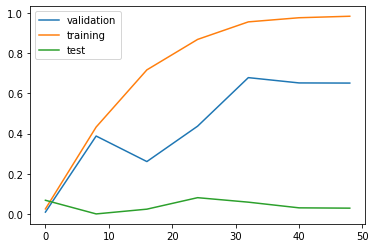

In [91]:
plt.plot(epoch_inputs_list, valid_scores_list, label="validation")
plt.plot(epoch_inputs_list, train_scores_list, label="training")
plt.plot(epoch_inputs_list, test_scores_list, label="test")
plt.legend()

In [ ]:
model.save()
model = model.load_from_dir('models')
valid_scores = model.evaluate(valid_dataset, [metric], transformers)

In [50]:
jinga=[]
jinga.append(10)

In [51]:
jinga

[10]